In [1]:
from cmb_simulation import *

In [2]:
# getCambSpectra
powers = getCambSpectra()
print(powers.keys())
print(powers['unlensed_scalar'].shape)

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])
(7051, 4)


# Basics

In [22]:
# get_ls
d = 0.1
N = 9
lx, ly = get_ls(d, N)
print(lx * d*N/2/np.pi)
print(ly * d*N/2/np.pi)
# validate:
# kx goes horizontally (second coord)
# ky goes vertically (first coord)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
[[ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [-4. -4. -4. -4. -4.]
 [-3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]]


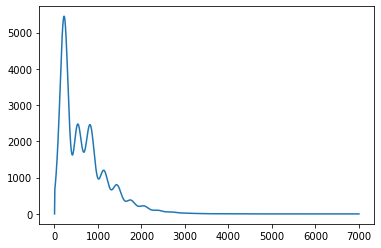

In [47]:
# Spectrum.plot
cmb = CMBSpectra(powers)
ls = np.linspace(1, 7000, 1000)
cmb.TT.plot(ls, lambda l: l**2/(2*np.pi))

# Generating maps by sampling

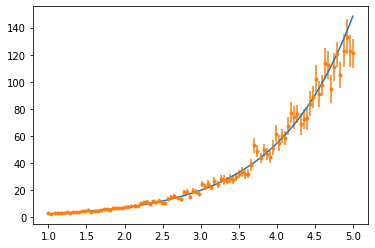

In [56]:
spec = Spectrum(np.exp)
ls = np.linspace(1, 5, 100)
samples = np.array([spec.sample(ls) for _ in range(100)])
means = np.mean((samples*samples.conj()).real, axis=0)
stds = np.std((samples*samples.conj()).real, axis=0)/np.sqrt(100)

spec.plot(ls)
plt.errorbar(ls, means, stds, fmt='.')
plt.show()
# validate: line goes through points, error bars make sense

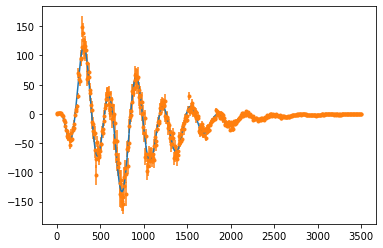

In [57]:
# choleskyUnlensed, sampleCov
cmb = CMBSpectra(powers)
ls = np.linspace(0, 3500, 500)
chol = cmb.choleskyUnlensed(ls)
samples = np.array([sampleCov(chol) for _ in range(100)])
means_TT = np.mean((samples[:,:,0]*samples[:,:,0].conj()).real, axis=0)
stds_TT = np.std((samples[:,:,0]*samples[:,:,0].conj()).real, axis=0)/np.sqrt(100)
means_EE = np.mean((samples[:,:,1]*samples[:,:,1].conj()).real, axis=0)
stds_EE = np.std((samples[:,:,1]*samples[:,:,1].conj()).real, axis=0)/np.sqrt(100)
means_TE = np.mean((samples[:,:,0]*samples[:,:,1].conj()).real, axis=0)
stds_TE = np.std((samples[:,:,0]*samples[:,:,1].conj()).real, axis=0)/np.sqrt(100)

# cmb.TT.plot(ls, lambda l: l**2/(2*np.pi))
# plt.errorbar(ls, means_TT*ls**2/(2*np.pi), stds_TT*ls**2/(2*np.pi), fmt='.')
# cmb.EE.plot(ls, lambda l: l**2/(2*np.pi))
# plt.errorbar(ls, means_EE*ls**2/(2*np.pi), stds_EE*ls**2/(2*np.pi), fmt='.')
cmb.TE.plot(ls, lambda l: l**2/(2*np.pi))
plt.errorbar(ls, means_TE*ls**2/(2*np.pi), stds_TE*ls**2/(2*np.pi), fmt='.')
plt.show()
# validate: curves passes through points, error bars look reasonable

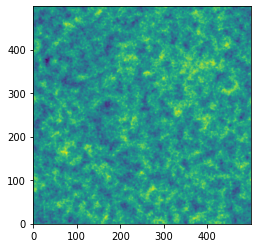

In [3]:
# generatePrimordialMaps, CMBMap.plot
d = 0.001
N = 500
cmb = CMBSpectra(powers)
teb, p = cmb.generatePrimordialMaps(d, N)

teb.T.plot()
# teb.E.plot()
# p.plot()

In [84]:
# temperature fluctuation
d = 0.001
N = 500
cmb = CMBSpectra(powers)
teb, p = cmb.generatePrimordialMaps(d, N)

np.std(teb.T.r)
# validate: stdev ~ 100 muK

102.97210537774505

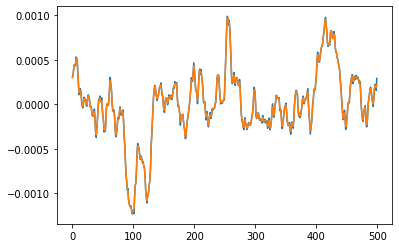

2.1643849558806374

In [10]:
# grad, RMS lensing deflection
d = 0.001
N = 500
cmb = CMBSpectra(powers)
teb, p = cmb.generatePrimordialMaps(d, N)

px, py = grad(p)
py_np, px_np = np.gradient(p.r, d)

plt.plot(px.r[100])
plt.plot(px_np[100])
plt.show()

np.sqrt(np.mean(px.r**2 + py.r**2)) / np.pi*180*60
# validate: curves overlap
# ~2 arcmin

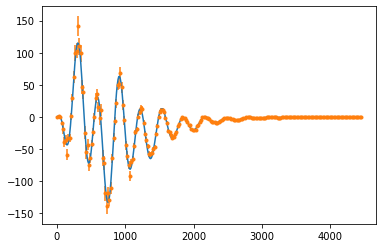

In [73]:
# generatePrimordialMaps, binnedCorrelation
d = 0.001
N = 500
cmb = CMBSpectra(powers)
teb, p = cmb.generatePrimordialMaps(d, N)

cmb.TE.plot(np.linspace(1, 4200, 400), lambda l: l**2/(2*np.pi))
avg = binnedCorrelation(teb.T, teb.E)
avg.plot(lambda l: l**2/(2*np.pi), fmt='.')
# validate: curve passes through points, error bars are reasonable

In [13]:
# getTQU
d = 0.001
N = 500
cmb = CMBSpectra(powers)
teb, p = cmb.generatePrimordialMaps(d, N)
tqu = teb.getTQU()

lx, ly = get_ls(d, N)
phi_l = np.arctan2(ly, lx)
P1 = teb.E.f + 1j*teb.B.f
P2 = np.exp(-2j*phi_l) * (tqu.Q.f + 1j*tqu.U.f)
np.max(((P1-P2)*(P1-P2).conj()).real)
# validate: difference is tiny

5.624828165360588e-23

In [15]:
# getTEB
d = 0.001
N = 500
cmb = CMBSpectra(powers)
teb, p = cmb.generatePrimordialMaps(d, N)
tqu = teb.getTQU()
teb2 = tqu.getTEB()

np.max(teb.E.r-teb2.E.r)-np.min(teb.E.r-teb2.E.r)
# validate: difference is tiny

2.3092638912203256e-14

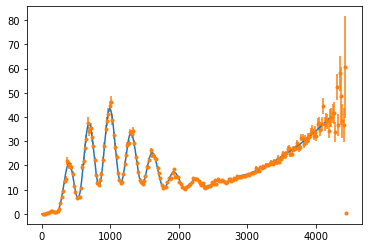

In [31]:
# addNoise
d = 0.001
N = 500
cmb = CMBSpectra(powers)
teb, p = cmb.generatePrimordialMaps(d, N)
simons = Detector(*simons_params)
teb_obs = simons.addNoise(teb)

(cmb.EE + simons.EEn).plot(np.linspace(1, 4200, 500), lambda l: l**2/(2*np.pi))
teb_obs.E.binSpectrum().plot(lambda l: l**2/(2*np.pi), fmt='.')
# validate: curves match and error bars are reasonable

# Lensing and convolution

In [86]:
d = 0.0004
N = 1000
cmb = CMBSpectra(powers)
teb, p = cmb.generatePrimordialMaps(d, N)

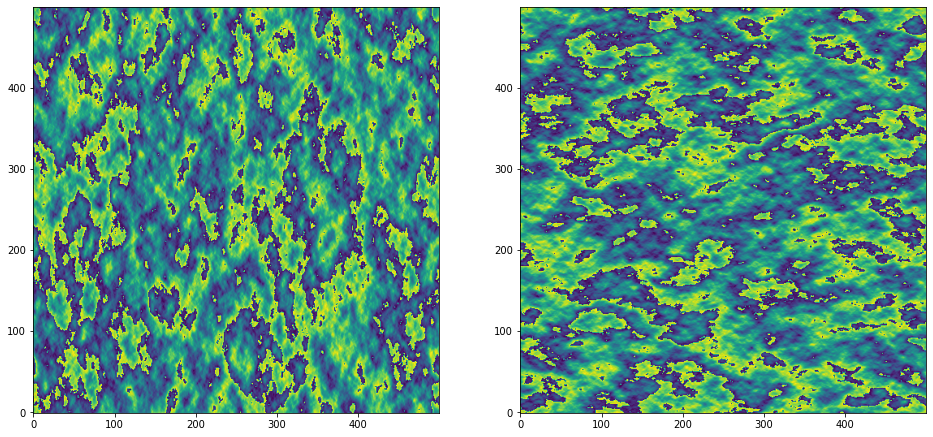

In [42]:
inds = np.arange(N)
indx, indy = np.meshgrid(inds, inds)
px, py = grad(p)

plot2Maps(indx+px.r/d-np.rint(indx+px.r/d), indy+py.r/d-np.rint(indy+py.r/d))

In [39]:
def lensFunc(cmbmap, p):
    d = cmbmap.d
    N = cmbmap.N
    px, py = grad(p) # radians
    mx, my = grad(cmbmap)
    mxx, mxy = grad(mx)
    myx, myy = grad(my)
    mxxx, mxxy = grad(mxx)
    mxyx, mxyy = grad(mxy)
    myyx, myyy = grad(myy)

    inds = np.arange(N)
    indx, indy = np.meshgrid(inds, inds)
    # fractional pixel at which to get value
    len_indx = indx + px.r/d # pixel units
    len_indy = indy + py.r/d
    # nearest integer pixel from which to Taylor expand, before mod N
    near_indx_pre = np.rint(len_indx)
    near_indy_pre = np.rint(len_indy)
    # delta
    deltax = (len_indx - near_indx_pre) * d # radians
    deltay = (len_indy - near_indy_pre) * d 
    # actual integer pixel value wrapped to 0...N-1
    near_indx = (near_indx_pre % N).astype(int)
    near_indy = (near_indy_pre % N).astype(int)

    lensed_map_r = np.zeros((N, N))
    for ind in np.ndindex(N, N):
        new_ind = (near_indy[ind], near_indx[ind])
        order0 = cmbmap.r[new_ind]
        order1 = mx.r[new_ind]*deltax[new_ind] + my.r[new_ind]*deltay[new_ind]
        order2 = 0.5*(mxx.r[new_ind]*deltax[new_ind]**2 + 2*mxy.r[new_ind]*deltax[new_ind]*deltay[new_ind] + myy.r[new_ind]*deltay[new_ind]**2)
        order3 = 1/6*(mxxx.r[new_ind]*deltax[new_ind]**3 + 3*mxxy.r[new_ind]*deltax[new_ind]**2*deltay[new_ind] + 3*mxyy.r[new_ind]*deltax[new_ind]*deltay[new_ind]**2 + myyy.r[new_ind]*deltay[new_ind]**3)
        lensed_map_r[ind] = order0 - order1 + order2 - order3
    return CMBMap(d, N, real=lensed_map_r)

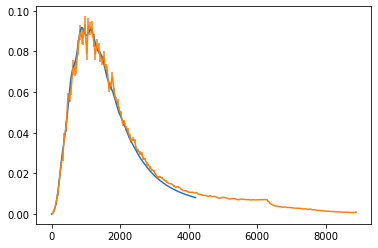

In [69]:
teb_len = lensTEB(teb, p, fun=lensInterp)

cmb.BB_len.plot(np.linspace(1, 4200, 500), lambda l: l**2/(2*np.pi))
teb_len.B.binSpectrum(delta=50).plot(lambda l: l**2/(2*np.pi))

In [44]:
teb_len1 = lensTEB(teb, p, fun=lensInterp)
teb_len2 = lensTEB(teb, p, fun=lensTaylor)
teb_len3 = lensTEB(teb, p, fun=lensNearest)

In [60]:
np.std(teb_len1.B.r)

0.4044588450488856

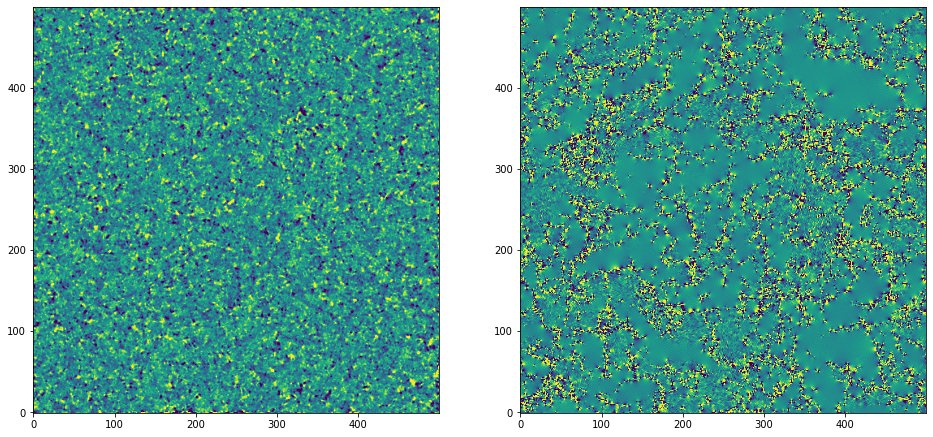

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].imshow(teb_len1.B.r, origin='lower', vmin=-1, vmax=1)
ax[1].imshow(teb_len2.B.r-teb_len3.B.r, origin='lower', vmin=-1, vmax=1)
plt.show()

# Rotation

# Testing

## What we know:
1. get_ls is fine, just flipped meaning of x, y
1. grad is fine, again flipped meaning of x, y
1. Bin averaging is fine

In [4]:
d = 0.0004
N = 1000
T = CMBMap(d, N, real=np.load('T.npy'))
E = CMBMap(d, N, real=np.load('E.npy'))
B = CMBMap(d, N, real=np.load('B.npy'))
p = CMBMap(d, N, real=np.load('p.npy'))
teb = TEB(T, E, B)

In [84]:
teb_len = lensTEB(teb, p, fun=lensNearest)

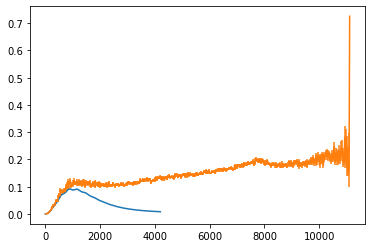

In [85]:
cmb.BB_len.plot(np.linspace(1, 4200, 500), lambda l: l**2/(2*np.pi))
binnedCorrelation(teb_len.B, teb_len.B).plot(lambda l: l**2/(2*np.pi))

In [10]:
cmb = CMBSpectra(powers)

In [8]:
d = 0.0004
N = 1000
# cmb = CMBSpectra(powers)
# teb, p = cmb.generatePrimordialMaps(d, N)
defl = deflection(p, d, N)

# below should reproduce the same result as in v3 but it doesn't!!???
# the only reference to v4, I think, is in CMBMap <--- check this
Q, U = EB2QU(teb.E, teb.B)
T_len = lensMapTaylor(teb.T, defl)
Q_len = lensMapTaylor(Q, defl)
U_len = lensMapTaylor(U, defl)
E_len, B_len = QU2EB(Q_len, U_len)
teb_len = TEB(T_len, E_len, B_len)

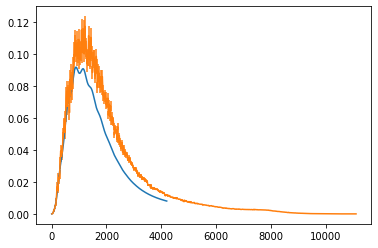

In [11]:
cmb.BB_len.plot(np.linspace(1, 4200, 500), lambda l: l**2/(2*np.pi))
teb_len.B.binSpectrum().plot(lambda l: l**2/(2*np.pi))

In [15]:
lx, ly = get_ls(1, 10)
print(lx)
print(ly)

[[0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265]
 [0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265]
 [0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265]
 [0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265]
 [0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265]
 [0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265]
 [0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265]
 [0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265]
 [0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265]
 [0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265]]
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.62831853  0.62831853  0.62831853  0.62831853  0.62831853  0.62831853]
 [ 1.25663706  1.25663706  1.25663706  1.25663706  1.25663706  1.25663706]
 [ 1.88495559  1.88495559  1.88495559  1.88495559  1.88495559  1.88495559]
 [ 2.5132

In [16]:
p_real = np.load('p.npy')
px, py = grad(CMBMap(0.0004, 1000, real=p_real))

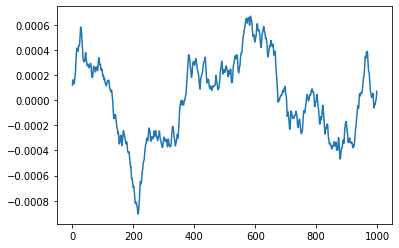

In [20]:
plt.plot(py.r[200])

In [7]:
d = 0.0004
N = 1000
T_len = CMBMap(d, N, real=np.load('T_len.npy'))
E_len = CMBMap(d, N, real=np.load('E_len.npy'))
B_len = CMBMap(d, N, real=np.load('B_len.npy'))
teb_len = TEB(T_len, E_len, B_len)

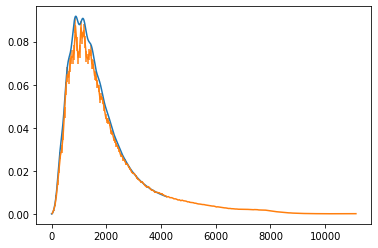

In [9]:
cmb.BB_len.plot(np.linspace(1, 4200, 500), lambda l: l**2/(2*np.pi))
teb_len.B.binSpectrum(delta=50).plot(lambda l: l**2/(2*np.pi))

In [6]:
def EB2QU(E_map, B_map):
    '''
    Given CMBMaps E and B, returns CMBMaps Q and U
    '''
    ls_grid = get_ls_old(0.4, 1000)
    E = E_map.f
    B = B_map.f
    phi = np.zeros(ls_grid.shape[:2])
    for i, j in np.ndindex(phi.shape):
        phi[i,j] = np.angle(ls_grid[i,j,0]+1j*ls_grid[i,j,1])
    cos2phi = np.cos(2*phi)
    sin2phi = np.sin(2*phi)
    Q = E*cos2phi - B*sin2phi
    U = E*sin2phi + B*cos2phi
    Q_map = CMBMap(d, N, fourier=Q)
    U_map = CMBMap(d, N, fourier=U)
    return Q_map, U_map

def QU2EB(Q_map, U_map):
    '''
    Given CMBMaps Q and U, returns CMBMaps E and B
    '''
    ls_grid = get_ls_old(0.4, 1000)
    Q = Q_map.f
    U = U_map.f
    phi = np.zeros(ls_grid.shape[:2])
    for i, j in np.ndindex(phi.shape):
        phi[i,j] = np.angle(ls_grid[i,j,0]+1j*ls_grid[i,j,1])
    cos2phi = np.cos(2*phi)
    sin2phi = np.sin(2*phi)
    E = Q*cos2phi + U*sin2phi
    B = -Q*sin2phi + U*cos2phi
    E_map = CMBMap(d, N, fourier=E)
    B_map = CMBMap(d, N, fourier=B)
    return E_map, B_map